In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
vinos_espana= pd.read_csv("wines_SPA.csv", sep = ",")
#fuente_1 = "https://www.kaggle.com/code/sasakitetsuya/spanish-wine-analysis-clustering-wine-map"

consumo_espana= pd.read_csv("totales_vino_y_otros.csv", sep = ";")
#fuente_2 = "https://datos.gob.es/en/catalogo?q=informe_consumo_nacional_datos_noviembre_2024"

consumo_semanal = pd.read_csv('bebidas_c_semanal.csv', sep = ";")
#fuente_3 = "https://datos.gob.es/en/catalogo?q=informe_bebidas_alcoholicas"

In [25]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de datasets
vinos_espana = pd.read_csv("wines_SPA.csv", sep=",")
consumo_espana = pd.read_csv("totales_vino_y_otros.csv", sep=";")
consumo_semanal = pd.read_csv('bebidas_c_semanal.csv', sep=";")

# Hipótesis principal
print("Hipótesis Principal: La relación calidad-precio es el principal factor que influye en las calificaciones y reseñas positivas de los vinos en España.")

# Hipótesis secundarias
hipotesis_secundarias = [
    "Hipótesis 2: Los vinos de ciertas regiones específicas de España tienden a recibir mejores calificaciones",
    "Hipótesis 3: Los vinos de regiones menos conocidas pueden destacar por su autenticidad y buena relación calidad-precio",
    "Hipótesis 4: Los vinos de bodegas más reconocidas obtienen mejores calificaciones, independientemente del precio",
    "Hipótesis 5: El equilibrio entre acidez y cuerpo en un vino suele asociarse con mejores valoraciones y precios más altos"
]

for hipotesis in hipotesis_secundarias:
    print(f"\n- {hipotesis}")

Hipótesis Principal: La relación calidad-precio es el principal factor que influye en las calificaciones y reseñas positivas de los vinos en España.

- Hipótesis 2: Los vinos de ciertas regiones específicas de España tienden a recibir mejores calificaciones

- Hipótesis 3: Los vinos de regiones menos conocidas pueden destacar por su autenticidad y buena relación calidad-precio

- Hipótesis 4: Los vinos de bodegas más reconocidas obtienen mejores calificaciones, independientemente del precio

- Hipótesis 5: El equilibrio entre acidez y cuerpo en un vino suele asociarse con mejores valoraciones y precios más altos


In [26]:
# Limpieza inicial
vinos_espana['region'] = vinos_espana['region'].str.lower()

# Relleno valores faltantes en 'type' con los de 'region'
vinos_espana['type'] = vinos_espana['type'].fillna(vinos_espana['region'])

# Relleno valores faltantes con la media de la misma región
for region, grupo in vinos_espana.groupby('region'):
    mean_body = grupo['body'].mean()
    mean_acidity = grupo['acidity'].mean()
    vinos_espana.loc[grupo.index, 'body'] = grupo['body'].fillna(mean_body)
    vinos_espana.loc[grupo.index, 'acidity'] = grupo['acidity'].fillna(mean_acidity)

# Elimino filas con valores nulos y duplicados
vinos_espana = vinos_espana.dropna()
#vinos_espana = vinos_espana.drop_duplicates()

# Creación de subconjuntos por precio
vinos_hasta_100 = vinos_espana[vinos_espana["price"] <= 100].copy()
vinos_desde_100 = vinos_espana[vinos_espana["price"] >= 100].copy()

# Verificación de limpieza
print("\nResumen de limpieza:")
print(f"Filas originales: 7500")
print(f"Filas después de limpieza: {vinos_espana.shape[0]}")
print(f"Vinos hasta 100€: {vinos_hasta_100.shape[0]}")
print(f"Vinos desde 100€: {vinos_desde_100.shape[0]}")


Resumen de limpieza:
Filas originales: 7500
Filas después de limpieza: 7467
Vinos hasta 100€: 6931
Vinos desde 100€: 539



Estadísticas descriptivas para vinos hasta 100€:
             price       rating         body      acidity
count  6931.000000  6931.000000  6931.000000  6931.000000
mean     34.642401     4.232852     4.124726     2.957172
std      20.591816     0.081073     0.560153     0.211135
min       4.990000     4.200000     2.000000     1.000000
25%      18.900000     4.200000     4.000000     3.000000
50%      28.300000     4.200000     4.000000     3.000000
75%      48.960000     4.200000     4.000000     3.000000
max     100.000000     4.700000     5.000000     3.000000

Estadísticas descriptivas para vinos desde 100€:
             price      rating        body     acidity
count   539.000000  539.000000  539.000000  539.000000
mean    388.421359    4.532839    4.423082    2.865861
std     439.288166    0.156333    0.579752    0.440469
min     100.000000    4.200000    2.000000    1.000000
25%     140.000000    4.400000    4.000000    3.000000
50%     205.000000    4.500000    4.000000    3.

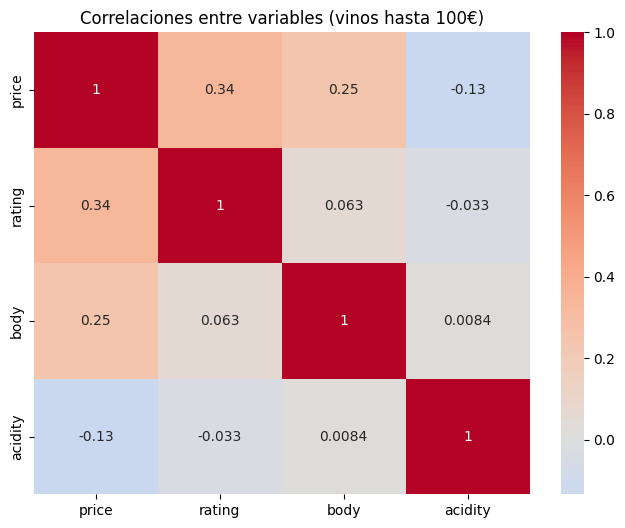


Top 10 regiones con más vinos:
region
rioja                 2440
ribera del duero      1412
priorato               686
toro                   300
vino de espana         262
rias baixas            252
jerez-xeres-sherry     247
bierzo                 244
mallorca               237
alicante               233
Name: count, dtype: int64


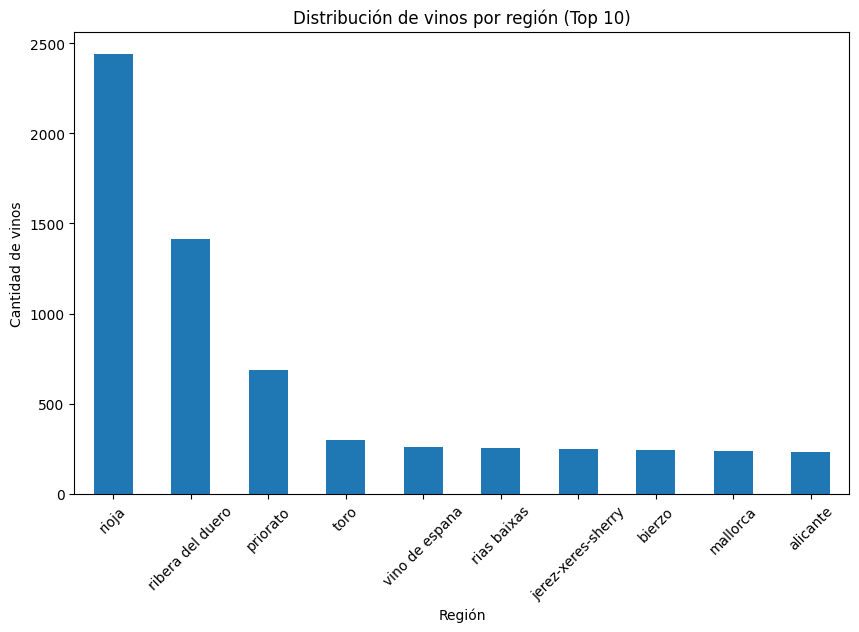

In [27]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas para vinos hasta 100€:")
print(vinos_hasta_100[['price', 'rating', 'body', 'acidity']].describe())

print("\nEstadísticas descriptivas para vinos desde 100€:")
print(vinos_desde_100[['price', 'rating', 'body', 'acidity']].describe())

# Correlaciones
print("\nMatriz de correlación para vinos hasta 100€:")
correlaciones_hasta_100 = vinos_hasta_100[['price', 'rating', 'body', 'acidity']].corr()
print(correlaciones_hasta_100)

# Visualización de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones_hasta_100, annot=True, cmap='coolwarm', center=0)
plt.title('Correlaciones entre variables (vinos hasta 100€)')
plt.show()

# Análisis por regiones
top_regiones = vinos_espana['region'].value_counts().head(10)
print("\nTop 10 regiones con más vinos:")
print(top_regiones)

plt.figure(figsize=(10, 6))
top_regiones.plot(kind='bar')
plt.title('Distribución de vinos por región (Top 10)')
plt.xlabel('Región')
plt.ylabel('Cantidad de vinos')
plt.xticks(rotation=45)
plt.show()

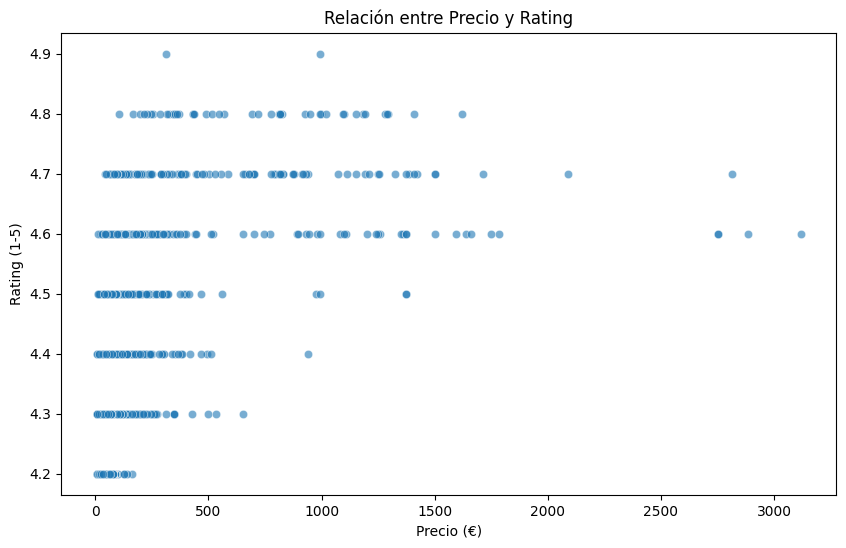


Top 5 regiones con mejor rating promedio:
region
montilla-moriles             4.542308
cigales                      4.500000
tierra del vino de zamora    4.500000
dehesa del carrizal          4.500000
jumilla                      4.496154
Name: rating, dtype: float64

Rating promedio en regiones menos conocidas:
4.341666666666666

Rating promedio de bodegas más reconocidas:
4.211801242236025


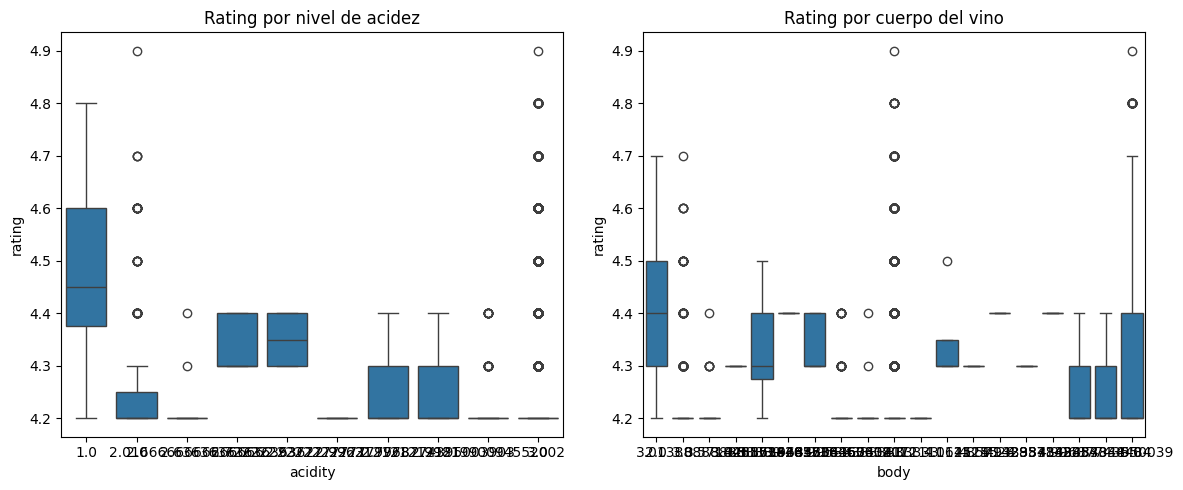

In [28]:
# Hipótesis 1: Relación calidad-precio
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vinos_espana, x='price', y='rating', alpha=0.6)
plt.title('Relación entre Precio y Rating')
plt.xlabel('Precio (€)')
plt.ylabel('Rating (1-5)')
plt.show()

# Hipótesis 2: Vinos de regiones específicas
top_regiones_rating = vinos_espana.groupby('region')['rating'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 regiones con mejor rating promedio:")
print(top_regiones_rating)

# Hipótesis 3: Regiones menos conocidas
regiones_menos_conocidas = vinos_espana['region'].value_counts().tail(10).index
vinos_regiones_menos_conocidas = vinos_espana[vinos_espana['region'].isin(regiones_menos_conocidas)]

print("\nRating promedio en regiones menos conocidas:")
print(vinos_regiones_menos_conocidas['rating'].mean())

# Hipótesis 4: Bodegas reconocidas
top_bodegas = vinos_espana['winery'].value_counts().head(10).index
vinos_top_bodegas = vinos_espana[vinos_espana['winery'].isin(top_bodegas)]

print("\nRating promedio de bodegas más reconocidas:")
print(vinos_top_bodegas['rating'].mean())

# Hipótesis 5: Acidez y cuerpo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=vinos_espana, x='acidity', y='rating')
plt.title('Rating por nivel de acidez')

plt.subplot(1, 2, 2)
sns.boxplot(data=vinos_espana, x='body', y='rating')
plt.title('Rating por cuerpo del vino')
plt.tight_layout()
plt.show()

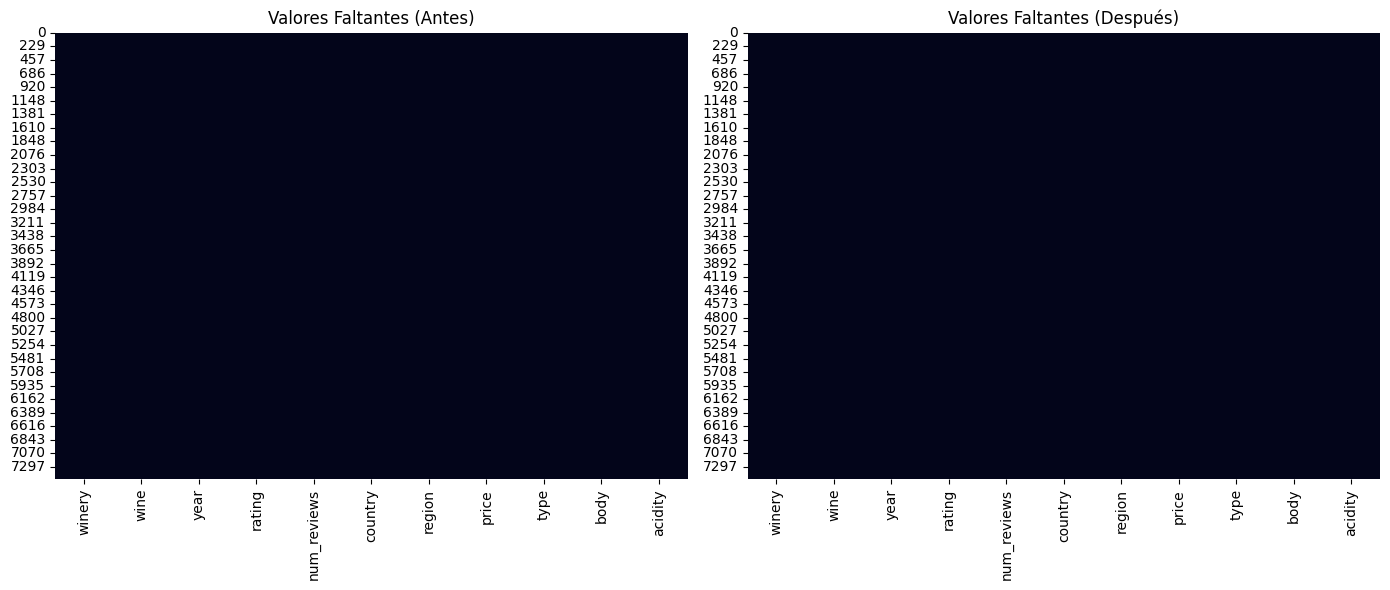

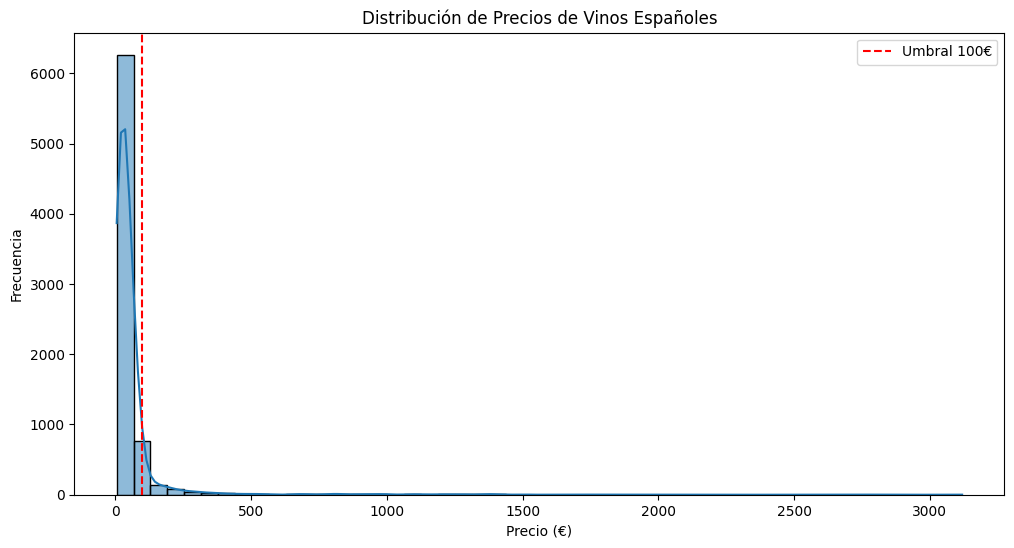

In [29]:
# Antes y después de la limpieza
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Antes
sns.heatmap(vinos_espana.isnull(), cbar=False, ax=axes[0])
axes[0].set_title('Valores Faltantes (Antes)')

# Después (simulado)
sns.heatmap(vinos_espana.dropna().isnull(), cbar=False, ax=axes[1])
axes[1].set_title('Valores Faltantes (Después)')

plt.tight_layout()
plt.show()

# Distribución de precios
plt.figure(figsize=(12, 6))
sns.histplot(vinos_espana['price'], bins=50, kde=True)
plt.title('Distribución de Precios de Vinos Españoles')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.axvline(x=100, color='r', linestyle='--', label='Umbral 100€')
plt.legend()
plt.show()

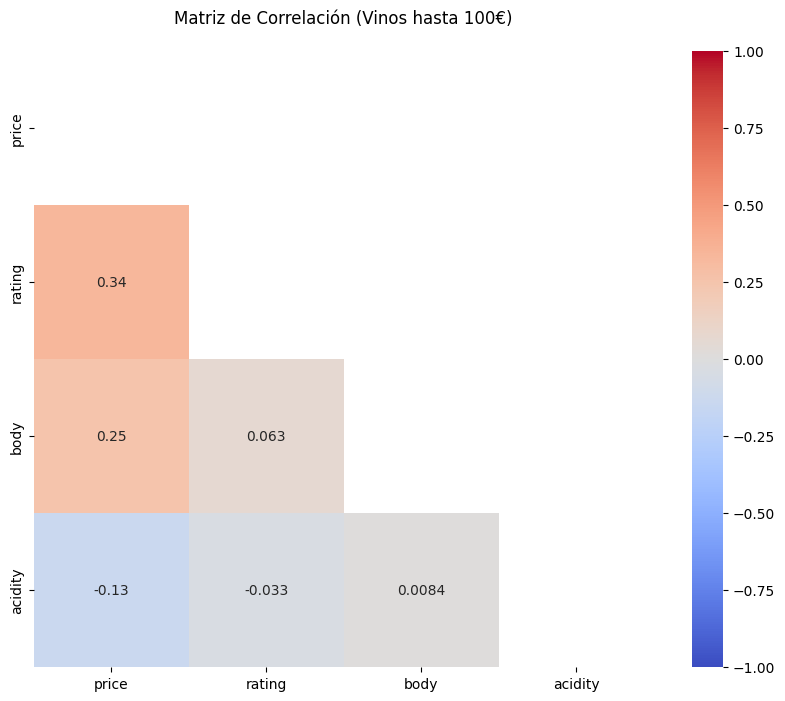

C:\Users\JUAN\AppData\Local\Temp\ipykernel_27672\2825075482.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regiones_rating.index, y=top_regiones_rating.values, palette='viridis')


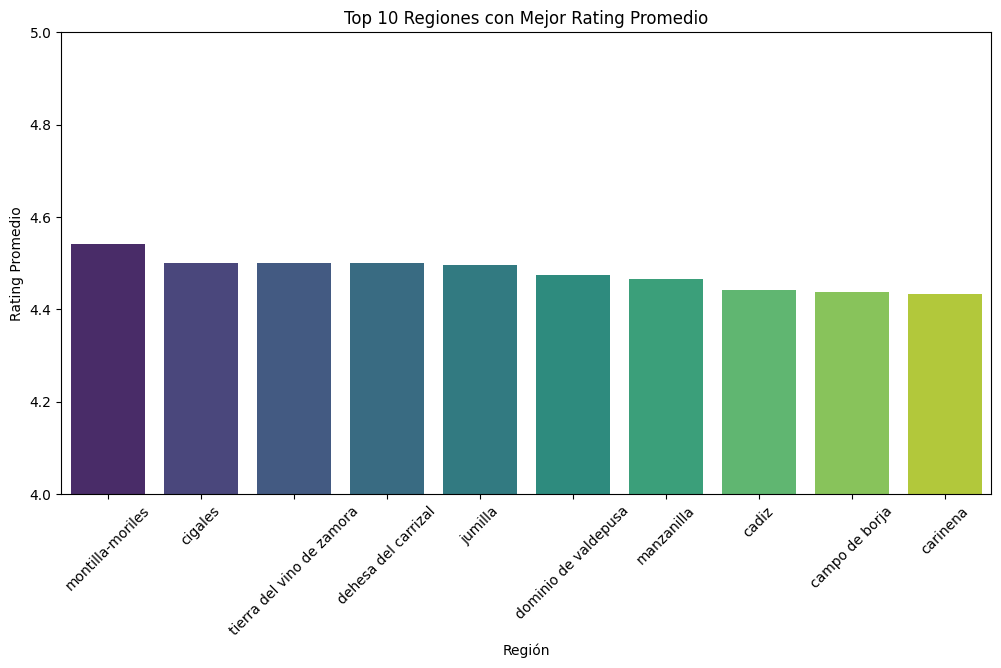

In [30]:
# Matriz de correlación mejorada
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlaciones_hasta_100, dtype=bool))
sns.heatmap(correlaciones_hasta_100, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación (Vinos hasta 100€)', pad=20)
plt.show()

# Top regiones con mejor rating
plt.figure(figsize=(12, 6))
top_regiones_rating = vinos_espana.groupby('region')['rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_regiones_rating.index, y=top_regiones_rating.values, palette='viridis')
plt.title('Top 10 Regiones con Mejor Rating Promedio')
plt.xlabel('Región')
plt.ylabel('Rating Promedio')
plt.xticks(rotation=45)
plt.ylim(4, 5)  # Escala fija para mejor comparación
plt.show()

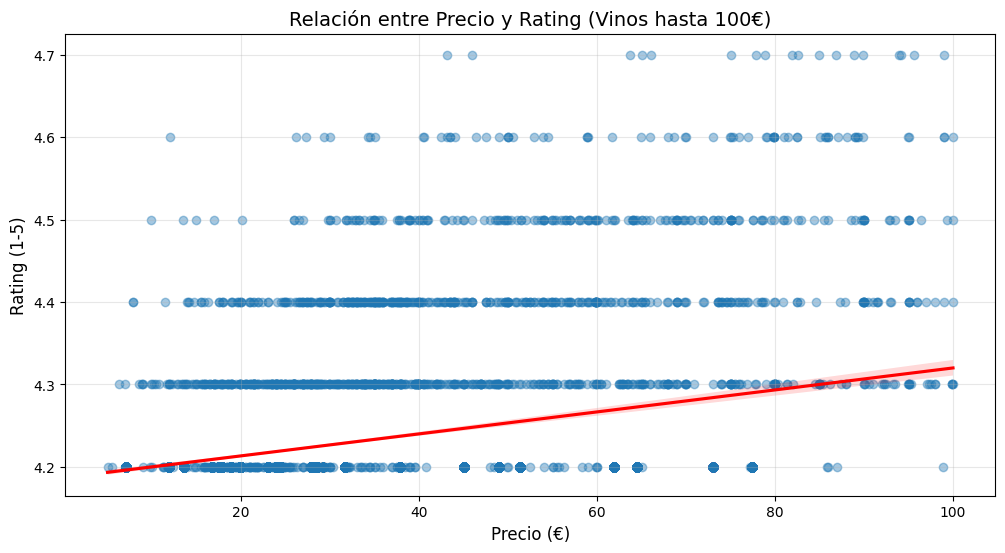

C:\Users\JUAN\AppData\Local\Temp\ipykernel_27672\1551450404.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=vinos_hasta_100, x='price_range', y='rating', palette='Blues')


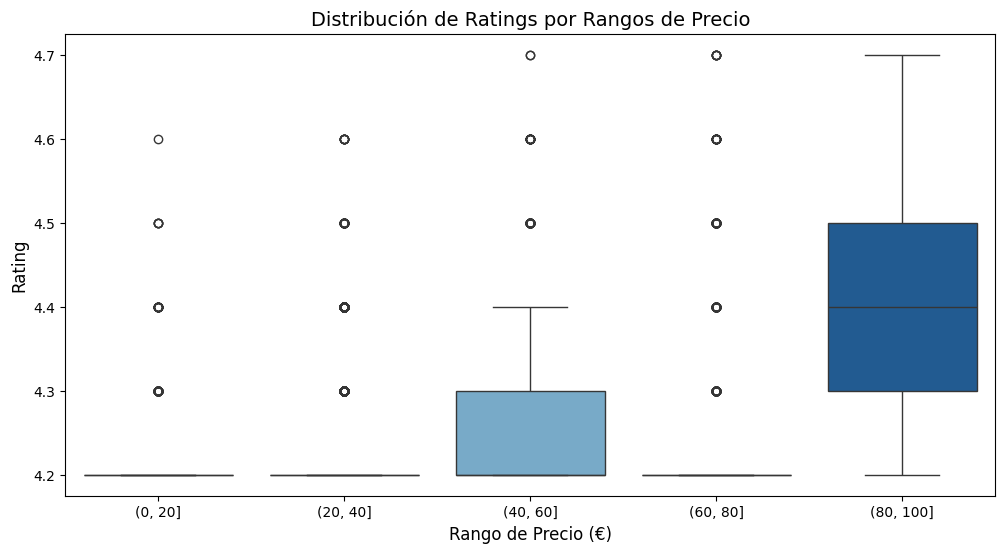

In [31]:
# Gráfico mejorado con línea de tendencia
plt.figure(figsize=(12, 6))
sns.regplot(data=vinos_hasta_100, x='price', y='rating', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relación entre Precio y Rating (Vinos hasta 100€)', fontsize=14)
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Rating (1-5)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot por rangos de precio
vinos_hasta_100['price_range'] = pd.cut(vinos_hasta_100['price'], bins=[0, 20, 40, 60, 80, 100])
plt.figure(figsize=(12, 6))
sns.boxplot(data=vinos_hasta_100, x='price_range', y='rating', palette='Blues')
plt.title('Distribución de Ratings por Rangos de Precio', fontsize=14)
plt.xlabel('Rango de Precio (€)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.show()

C:\Users\JUAN\AppData\Local\Temp\ipykernel_27672\702396946.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vinos_top_regiones['rating'], label='Top 5 Regiones', shade=True)
C:\Users\JUAN\AppData\Local\Temp\ipykernel_27672\702396946.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vinos_otras_regiones['rating'], label='Otras Regiones', shade=True)


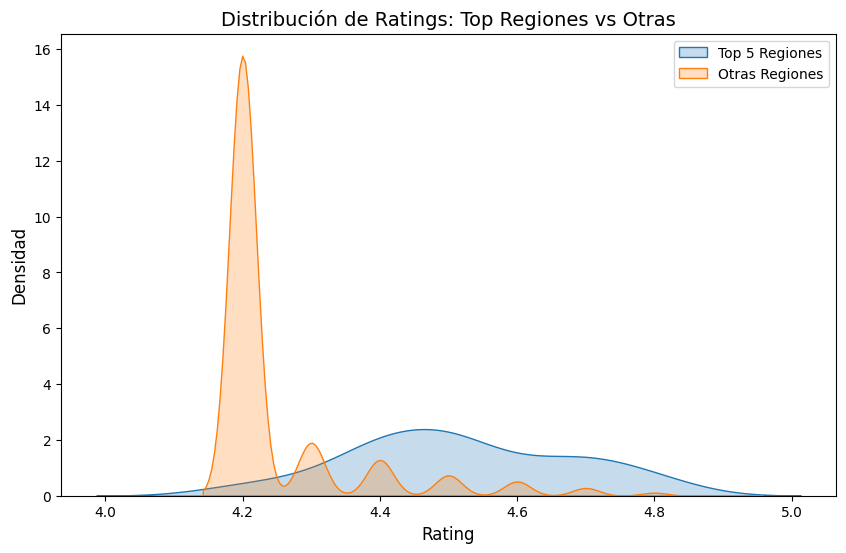

In [32]:
# Comparación entre regiones top y el resto
top_5_regiones = top_regiones_rating.head(5).index
vinos_top_regiones = vinos_espana[vinos_espana['region'].isin(top_5_regiones)]
vinos_otras_regiones = vinos_espana[~vinos_espana['region'].isin(top_5_regiones)]

plt.figure(figsize=(10, 6))
sns.kdeplot(vinos_top_regiones['rating'], label='Top 5 Regiones', shade=True)
sns.kdeplot(vinos_otras_regiones['rating'], label='Otras Regiones', shade=True)
plt.title('Distribución de Ratings: Top Regiones vs Otras', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()
plt.show()

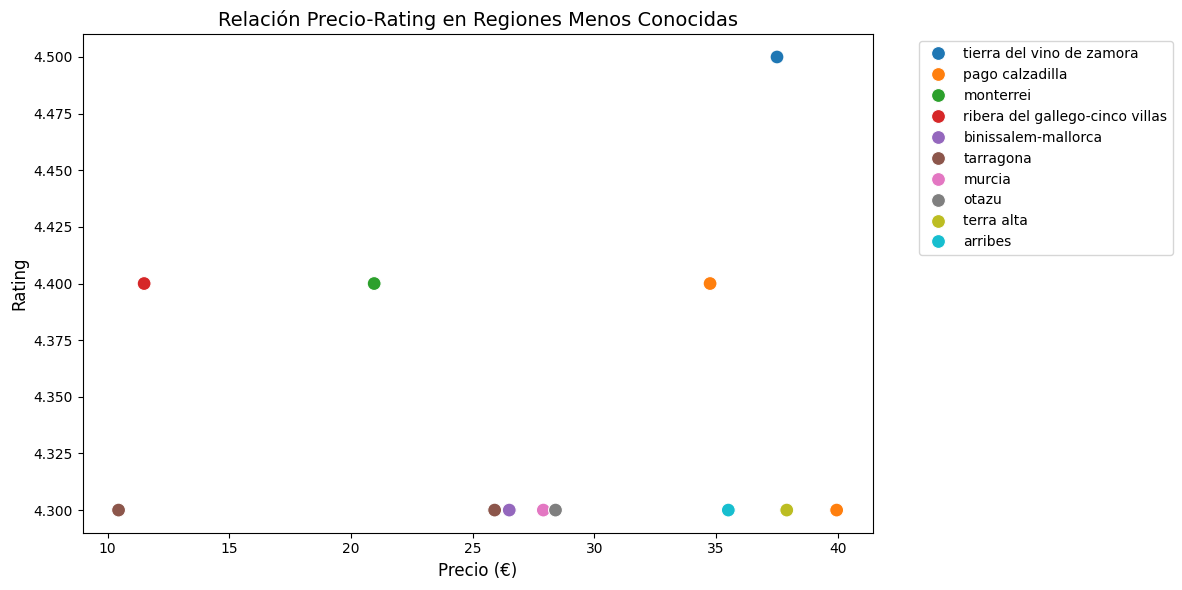

In [33]:
# Relación calidad-precio en regiones menos conocidas
plt.figure(figsize=(12, 6))
sns.scatterplot(data=vinos_regiones_menos_conocidas, x='price', y='rating', hue='region', palette='tab10', s=100)
plt.title('Relación Precio-Rating en Regiones Menos Conocidas', fontsize=14)
plt.xlabel('Precio (€)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

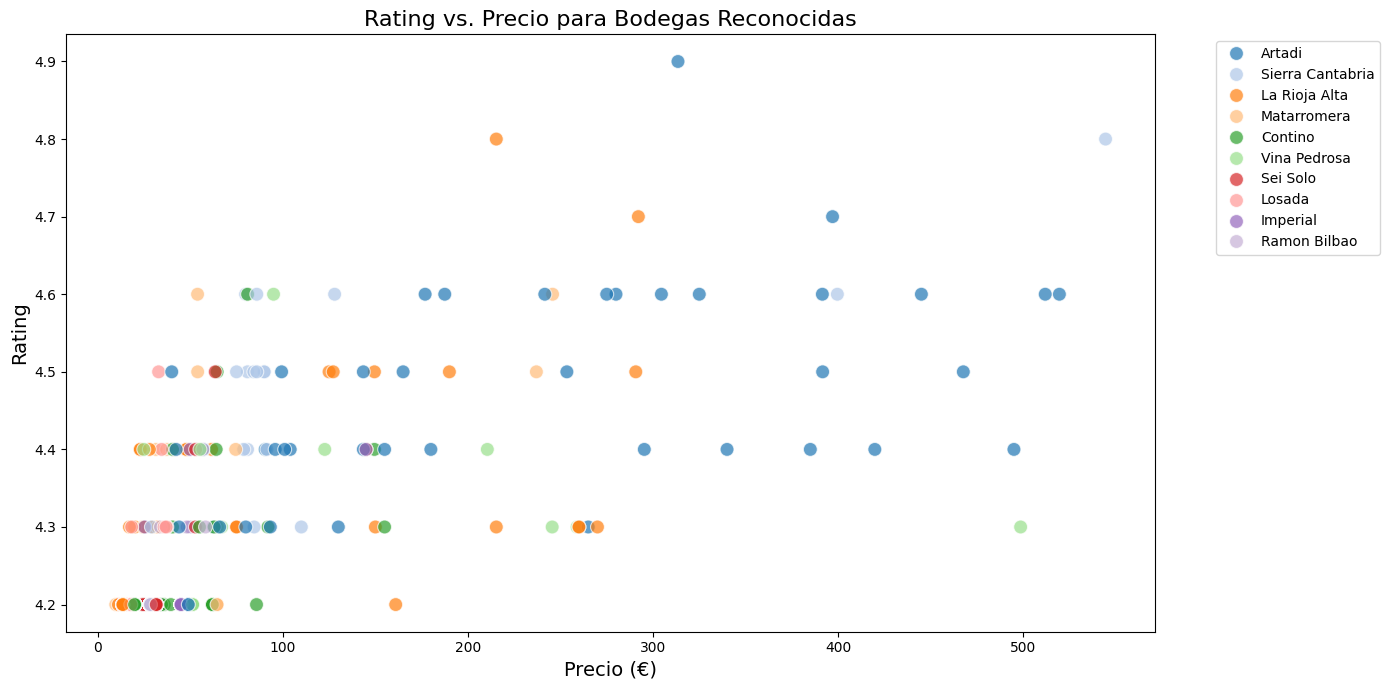

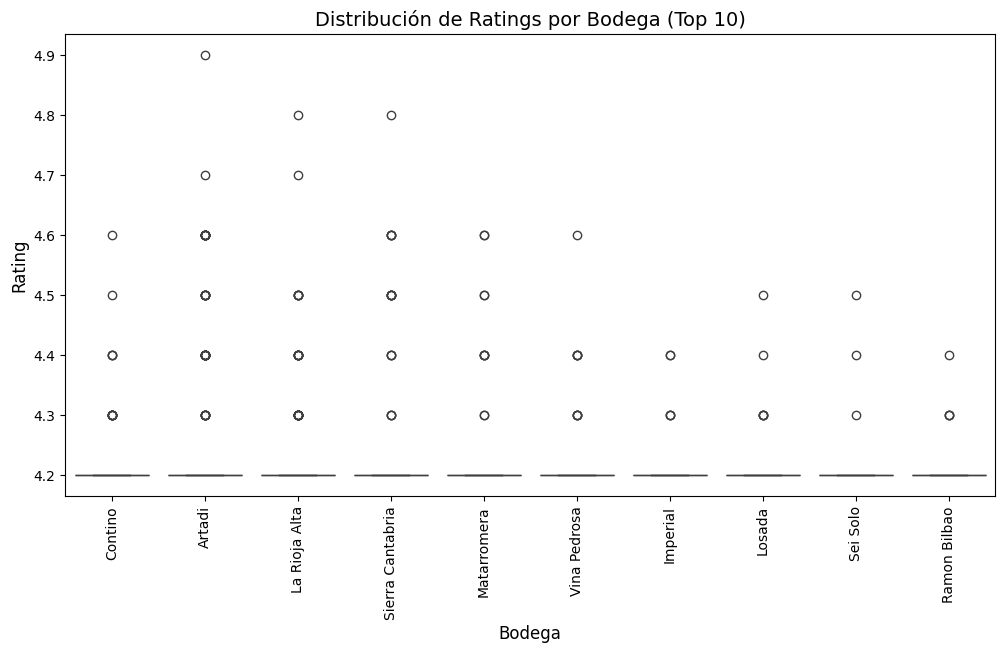

In [34]:
# Rating vs. Precio para bodegas top
plt.figure(figsize=(14, 7))
sns.scatterplot(data=vinos_top_bodegas, x='price', y='rating', hue='winery', 
                palette='tab20', s=100, alpha=0.7)
plt.title('Rating vs. Precio para Bodegas Reconocidas', fontsize=16)
plt.xlabel('Precio (€)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Boxplot comparativo
plt.figure(figsize=(12, 6))
sns.boxplot(data=vinos_espana, x='winery', y='rating', 
            order=vinos_top_bodegas['winery'].value_counts().index)
plt.title('Distribución de Ratings por Bodega (Top 10)', fontsize=14)
plt.xlabel('Bodega', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

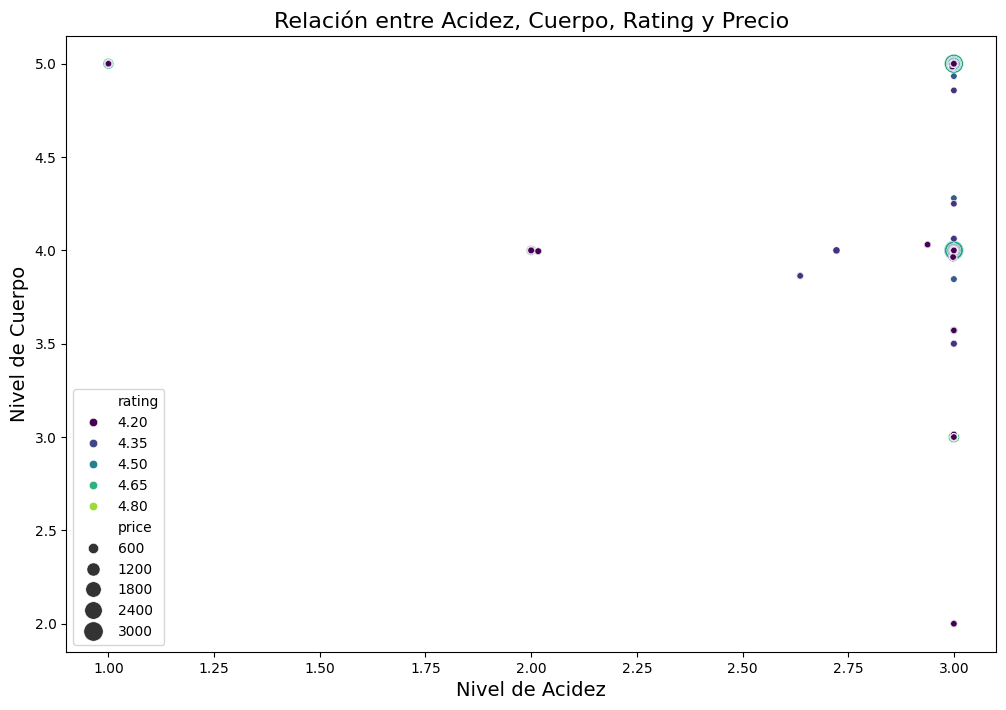

In [35]:
# Gráfico de interacción acidez-cuerpo
plt.figure(figsize=(12, 8))
sns.scatterplot(data=vinos_espana, x='acidity', y='body', hue='rating', 
                palette='viridis', size='price', sizes=(20, 200))
plt.title('Relación entre Acidez, Cuerpo, Rating y Precio', fontsize=16)
plt.xlabel('Nivel de Acidez', fontsize=14)
plt.ylabel('Nivel de Cuerpo', fontsize=14)
plt.colorbar(label='Rating')
plt.grid(True, alpha=0.3)
plt.show()

# Heatmap de rating promedio por acidez y cuerpo
heatmap_data = vinos_espana.groupby(['acidity', 'body'])['rating'].mean().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Rating Promedio'})
plt.title('Rating Promedio por Acidez y Cuerpo', fontsize=16)
plt.xlabel('Cuerpo', fontsize=14)
plt.ylabel('Acidez', fontsize=14)
plt.show()

In [ ]:
if not consumo_espana.empty:
    # Ejemplo de gráfico de consumo (ajustar según datos reales)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=consumo_espana, x='año', y='consumo_total', marker='o')
    plt.title('Evolución del Consumo de Vino en España', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Consumo Total (litros)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

if not consumo_semanal.empty:
    # Ejemplo de gráfico de consumo semanal
    plt.figure(figsize=(12, 6))
    sns.barplot(data=consumo_semanal, x='dia_semana', y='consumo', palette='Blues')
    plt.title('Consumo Semanal de Vino por Día', fontsize=16)
    plt.xlabel('Día de la Semana', fontsize=14)
    plt.ylabel('Consumo Promedio', fontsize=14)
    plt.show()

In [ ]:
# Resumen visual de correlaciones clave
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Precio vs Rating
sns.regplot(data=vinos_hasta_100, x='price', y='rating', ax=axes[0], scatter_kws={'alpha':0.3})
axes[0].set_title('Precio vs Rating', fontsize=12)
axes[0].set_xlabel('Precio (€)')
axes[0].set_ylabel('Rating')

# Acidez vs Rating
sns.boxplot(data=vinos_espana, x='acidity', y='rating', ax=axes[1])
axes[1].set_title('Acidez vs Rating', fontsize=12)
axes[1].set_xlabel('Nivel de Acidez')
axes[1].set_ylabel('Rating')

# Cuerpo vs Rating
sns.boxplot(data=vinos_espana, x='body', y='rating', ax=axes[2])
axes[2].set_title('Cuerpo vs Rating', fontsize=12)
axes[2].set_xlabel('Nivel de Cuerpo')
axes[2].set_ylabel('Rating')

plt.suptitle('Relaciones Clave en el Análisis de Vinos Españoles', fontsize=16)
plt.tight_layout()
plt.show()